Прежде чем вы решите эту задачу, убедитесь, что все работает должным образом. Для начала, **restart the kernel** (перезапустите ядро) (для этого:Kernel$\rightarrow$Restart)  после чего **run all cells** (запустите все ячейки) (для этого: select Cell$\rightarrow$Run All).

Убедитесь, что вы заполнили все места с надписью `YOUR CODE HERE` или "YOUR ANSWER HERE", а также ваше имя ниже:

In [1]:
NAME = "Vandyshev Georgii"

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D прямоугольная потенциальная яма

Рассмотрим квантовую частицу, описываемую волновой функцией $\psi(x)$ , находящуюся в потенциальной яме $V(x)$.
Для простоты рассмотрим только одномерную вещественную переменную $x$.

Волновая функция частицы подчиняется уравнению Шедингера


$$
-\frac{\hbar^2}{2m} \psi''(x)  + V(x)\psi(x) = E\psi(x)\;.
$$

Здесь $\hbar$ постоянная Планка, $m$ масса частицы (обе известны) и $E$ энергия частицы.


Учитывая граничные условия, ненулевое решение для $\psi(x)$ существует только для некоторых значений энергий. Физики говорят, что энергия частицы _квантована_. Математики говорят, что это не что иное, как проблема собственных значений оператора Штурма-Лиувилля


$$
L = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x) \;.
$$


Здесь мы рассматриваем так называемый потенциал прямоугольной ямы,


$$
V(x) = %
\begin{cases}
&0, &0 < x < a \\
&\infty, &\text{в остальных случаях.} 
\end{cases}
$$

Define
$$
E = \frac{\hbar^2}{2m} k^2
$$

Уравнение Шредингера для $0 < x < a$ становится

$$
\psi''(x) = -k^2 \psi(x)
$$

с граничными условиями $\psi(0) = \psi(a) = 0$.

Решения

$$\psi_n(x) = \sqrt{\frac{2}{a}} \sin{k_n x}$$


где

$$
k_n a = \pi n\;, \qquad n = 1, 2, \cdots
$$

Так что энергии равны

$$
E_n = \frac{\pi^2\hbar^2}{2ma^2} n^2
$$

# Задача 1. Собственные функции

Определите сетку

$$x_j = a \frac{j}{N}, \qquad j=0, \cdots, N
$$

и сеточную функцию $\psi_j$.

Уравнение Шредингера становится

$$
\psi_{j-1} + \psi_{j+1} - 2\psi_{j} = -k^2 h^2 \psi_j \; , \qquad j = 1, \cdots, N-1
$$

где $h=a/N$ является расстоянием между сетками, а граничнми условия являются $\psi_0 = \psi_N = 0$.

Обратите внимание, что последнее уравнение определяет задачу на собственные значения в  $N-1$ мерном пространстве, охватываемом векторами $(\psi_1, \psi_2, \cdots, \psi_{N-1})^T$. Здесь матрица, собственные значения которой мы ищем, является трехдиагональной, а допустимые значения $(k h)^2$ являются ее собственными значениями.

Напишите функцию, которая возвращает матрицу для задачи на собственные значения, описанной выше.

Функция numpy `np.fill_diagonal` может быть удобна при решении задачи. Также обратите внимание, что для заполнения диагоналей вы можете разрезать матрицу примерно так: `a[1:, :]`.

In [12]:
def hamiltonian(npts):
    """Постройте матрицу собственных значений для 1D уравнения Шредингера.
    
    на ввод
    ----------
    npts : int
        Количество узлов в меше: $x_j = a*j /npts$, with $j=0, ..., npts$
        
    выводит
    -------
    ham : ndarray, shape(npts-1, npts-1)
        Матрица меш версии оператора Штурма-Лиувилля.
    """
    return np.zeros((npts-1, npts-1)) - 2*np.diag(np.ones(npts-1)) + np.diag(np.ones(npts-2), 1) + np.diag(np.ones(npts-2), -1)
    raise NotImplementedError()

In [6]:
N = 10
ham = hamiltonian(N)
print(ham)
assert ham.shape == (N-1, N-1)


[[-2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.]]


# Задача 2. Решите задачу о собственных значениях

Напишите функцию, которая возвращает собственные значения и собственные векторы гамильтониана с учетом числа точек на сетке.

In [13]:
def eigensystem(N):
    """Постройте гамильтониан в меше и вычислите его собственные значения и собственные векторы.
    
    Получите собственные значения в отсортированном порядке.
    
    на ввод
    ----------
    N : int
        Количество узлов в меше: $x_j = a*j /N$, with $j=0, ..., N$.
        
    выводит
    -------
    vals : ndarray, shape(N-1,)
        Собственные значения в порядке возрастания.
        
    vects : ndarray, shape(N-1, N-1)
        Собственные векторы, расположенные в столбцах: `vect[:, j]` is the 
        нормализованный собственный вектор, соответствующий `vals[j]`.
    """
    def qr_algorithm(A, num_iter=10**5, eps=1e-10):
        T = A.copy()
        U = np.eye(A.shape[0])
        conv = [(T, U)]
        for i in range(num_iter):
            Q, R = np.linalg.qr(T)
            T = R @ Q
            U = U @ Q
            conv.append((T, U))
            if np.sum(np.abs(np.tril(T, k=-1))) < eps:
                break
        return T, U, conv[1:]
    ham = hamiltonian(N)
    T, U, conv = qr_algorithm(ham)
    vals = np.diag(T)
    sorting = vals.argsort()
    vals = vals[sorting]
    vects = U.T[sorting,:].T
    return vals, vects
    raise NotImplementedError()

In [10]:
from numpy.testing import assert_allclose
N = 10
ham = hamiltonian(10)
vals, vects = eigensystem(10)

assert (vals[1:] >= vals[:-1]).all()

for j in range(vals.shape[0]):
    assert_allclose(ham @ vects[:, j],
                    vals[j] * vects[:, j], atol=1e-10)


# Задача 3. Длинноволновый предел FD задачи

Мы ожидаем, что в пределе $N\to\infty$ решения дискретной системы стремятся к решению непрерывной задачи. 

Постройте спектр FD задачи для нескольких значений $N$. Обратите внимание, что спектр ограничен, т.е. мы можем только надеяться, что низколежащие состояния совпадают: для достаточно больших $N$, несколько первых состояний FD задачи близки к соответствующим собственным состояниям непрерывной задачи.  (Подробнее см., например, A.A. Samarski and A.V. Gulin, раздел 1.4.4)

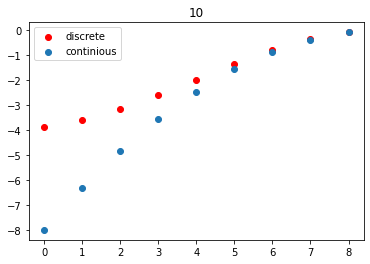

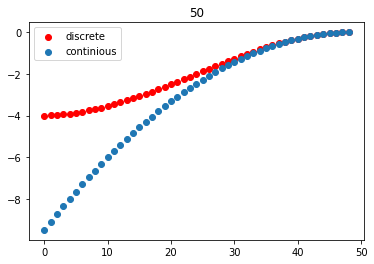

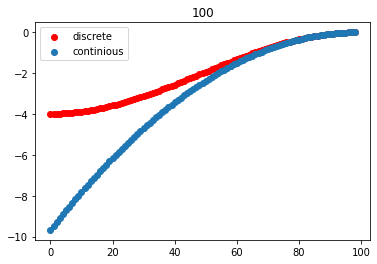

In [15]:
# Постройте спектр FD задачи для нескольких значений N.
# Постройте спектр непрерывной задачи на том же графике.
for n in [10, 50, 100]:
    ham = hamiltonian(n)
    eigvals, _ = eigensystem(n)
    theor_eigvals = -(np.pi**2*np.arange(1, n)**2/n**2)
    theor_eigvals.sort()
    eigvals.sort()
    plt.scatter(np.arange(len(eigvals)), eigvals, color="r", label="discrete")
    plt.scatter(np.arange(len(theor_eigvals)), theor_eigvals, label="continious")
    plt.title(str(n))
    plt.legend()
    plt.show()

Сделайте так, чтобы функция в ячейке ниже возвращала значение $N$ таким образом, чтобы первые 10 собственных значений FD задачи и непрерывной задачи совпадали в пределах относительного допуска $10^{-3}$.

In [16]:
def eigvals_diff(n):
    ham = hamiltonian(n)
    eigvals, _ = eigensystem(n)
    theor_eigvals = -(np.pi**2*np.arange(1, n)**2/n**2)
    theor_eigvals.sort()
    return np.sum(np.abs(eigvals[n-11:n-1]-theor_eigvals[n-11:n-1]))

def get_large_N():
    # YOUR CODE HERE
    n = 20
    while (eigvals_diff(n) > 10**(-7)):
        print(n)
        n = n*2
        print(eigvals_diff(n))
    return n

In [17]:
NN = get_large_N()
print(NN)
vals, _ = eigensystem(NN)
theor_eigvals = -(np.pi**2*np.arange(1, NN)**2/NN**2)
theor_eigvals.sort()
print(vals[NN-11:NN-1], theor_eigvals[NN-11:NN-1])
assert_allclose(vals[NN-11:NN-1], theor_eigvals[NN-11:NN-1], atol=10**(-7))

# остальная часть этой ячейки представляет собой тест, который сравнивает первые 10 собственных значений

20
0.07904970548486494
40
0.005000368767818183
80


# Задача 4. Волновые функции

Постройте волновые функции (т.е. собственные векторы) для нескольких наименьших  состояний. Сравните с ожидаемой формой. Сколько нулей имеет число собственных функций $k$?

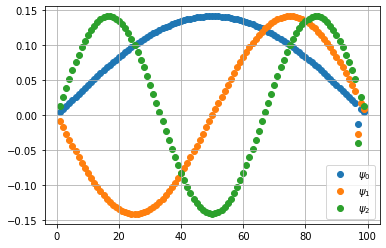

In [13]:
# постройте здесь волновые функции
fig = plt.figure()
_, vects = eigensystem(100)
for i in range(3):
    plt.scatter(np.arange(1,100,1), vects[i], label=f'$\\psi_{i}$')
plt.legend()
plt.grid()
plt.show()

# Задача 5. Возмущение

Рассмотрим теперь модифицированный потенциал: добавьте к потенциалу прямоугольной ямы дополнительный член

$$
V(x) = -\frac{\hbar^2}{2m}\, \gamma\, x(x-a)
$$

для $0 < x < a$, where $\gamma$ - константа.

Аналитическое решение можно выразить через функции параболического цилиндра, а численное решение является прямым продолжением того, что мы сделали в предыдущем разделе.

## Численное решение

Опять же, определите сеточную функцию $\psi_j$. Тогда уравнение Шредингера становится

$$
-\left( \psi_{j-1} + \psi_{j+1} - 2\psi_{j} \right) - \gamma h^2 x_j (x_j - a) \psi_j = k^2 h^2 \psi_j \; , \qquad j = 1, \cdots, N-1
$$

так что диагональные элементы гамильтоновой матрицы больше не являются константами.

Постройте гамильтонову матрицу, решите для собственных значений и постройте волновые функции основного состояния для диапазона $\gamma$. Обдумайте структуру волновой функции для $\gamma > 500$.

In [2]:
a = 10

In [3]:
def hamiltonian_perturbed(gamma, npts):
    """ Постройте матрицу собственных значений для дискретного 1D уравнения Шредингера..
    
    на ввод
    ----------
    gamma : float
        Дополнительный потенциал заключается в $gamma * x * (x-1)$
    npts : int
        Количество узлов в сетке меше: $x_j = a*j /npts$, with $j=0, ..., npts$
        
    выводит
    -------
    ham : ndarray, shape(npts-1, npts-1)
        Матрица меш версии оператора Штурма-Лиувилля.
    """
    grid = np.arange(1, npts) * a / npts
    H = np.zeros((npts-1, npts-1)) - 2*np.diag(np.ones(npts-1)) + np.diag(np.ones(npts-2), 1) + np.diag(np.ones(npts-2), -1)
    x = np.linspace(0, a, npts-1)
    H += np.diag(-gamma * grid * (grid - a) * (1/npts)**2)
    return H
    raise NotImplementedError()

In [4]:
gamma, N = 590, 11
h = hamiltonian_perturbed(gamma, N)
assert h.shape == (N-1, N-1)


In [5]:
def eigensystem_gamma(N,gamma):
    ham = hamiltonian_perturbed(gamma, N)
    true_eigvals, true_eigvec = np.linalg.eig(ham)
    sorting = true_eigvals.argsort()
    vals = true_eigvals[sorting]
    vects = true_eigvec.T[sorting,:].T
    return vals, vects

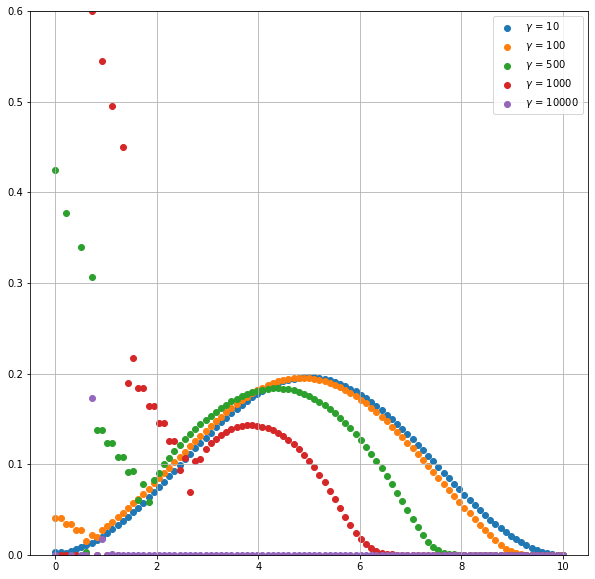

In [10]:
plt.figure(figsize=(10,10))
gammas = [10, 100, 500, 1000, 10000]
N = 100
x = np.linspace(0, a, N-1)
for gamma in gammas:
    _, vects = eigensystem_gamma(N,gamma)
    A = np.sum(np.abs(vects)**2, axis=1)*(x[1]-x[0])
    vects /= np.sqrt(A)
    plt.scatter(np.linspace(0,a,N-1), np.abs(vects[0])**2, label=f'$\\gamma$ = {gamma}')
plt.ylim([0,0.6])
plt.legend()
plt.grid()